# Bitcoin and Bitcoin Cash : Exploratory Data Analysis
### CoinMarketCap



Bitcoin Cash (BCH) emerged on August 1, 2017 after departing from Bitcoin’s (BTC) original blockchain via a hard fork. The separation happened in an attempt to manage BTC’s scalability problem. Part of the Bitcoin community, lead by Roger Ver, rallied for increasing Bitcoin’s block size. The Bitcoin community wanted to see Bitcoin thrive as a transactional currency, not an investment asset. 

Twice a year, the BCH network performs hard forks as part of scheduled protocol upgrades. The latest hard fork, scheduled for Nov. 15, was disrupted. 

### Import and instantiate CoinMarketcap
This object represents the data found at https://coinmarketcap.com.

The data is scraped using the modified version of  "https://github.com/LinuxIsCool/733Project/tree/master/CryptViz"

In [1]:
from Scrapers.Coinmarketcap import coinmarketcap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

downloading the main page of CoinMarketCap to find all the cryptocurrencies name.

In [2]:
cmk = coinmarketcap.CoinMarketcap()
coin_names = cmk.coin_names()
coin_names[0:10]

['Bitcoin',
 'Ethereum',
 'XRP',
 'Litecoin',
 'EOS',
 'Bitcoin Cash',
 'Binance Coin',
 'Stellar',
 'Tether',
 'TRON']

Scraping all the cryptocurrencies main pages

In [3]:
coins = cmk.coins()
coin_data = [coin.json() for coin in coins]
coin_data = pd.DataFrame(coin_data)
coin_data.head()

,github_url,marketcap,name,price,symbol,timestamp,url,volume
0,https://github.com/bitcoin/,71647703828,Bitcoin,4032.690000,None,None,http://coinmarketcap.com/currencies/bitcoin/,9344919956
1,https://github.com/ethereum,14797612389,Ethereum,139.250000,None,None,http://coinmarketcap.com/currencies/ethereum/,4251488129
2,https://github.com/ripple,13228510122,XRP,0.316756,None,None,http://coinmarketcap.com/currencies/ripple/,672954616
3,https://github.com/litecoin-project/litecoin,3694945405,Litecoin,60.220000,None,None,http://coinmarketcap.com/currencies/litecoin/,1824124623
4,https://github.com/eosio,3424468108,EOS,3.750000,None,None,http://coinmarketcap.com/currencies/eos/,1241517191


### Get Bitcoin Price History

In [7]:
coins = cmk.coins()
bitcoin = coins[0]
start, end = '20140101', '20190319'
bitcoin.get_history(start, end)
btc_history = bitcoin.read_history()
btc_history['dt'] = pd.to_datetime(btc_history['Date'])
btc_history.head()


,Unnamed: 0,Date,Open*,High,Low,Close**,Volume,Market Cap,dt
0,0,"Mar 19, 2019",4032.69,4082.22,4023.81,4071.19,9344919956,71647703828,2019-03-19
1,1,"Mar 18, 2019",4029.97,4071.56,4009.12,4032.51,9646954186,70958165407,2019-03-18
2,2,"Mar 17, 2019",4047.72,4054.12,4006.41,4025.23,8221625400,70821939585,2019-03-17
3,3,"Mar 16, 2019",3963.90,4077.04,3961.66,4048.73,9856166973,71227967573,2019-03-16
4,4,"Mar 15, 2019",3926.66,3968.54,3914.02,3960.91,9394210605,69675002377,2019-03-15


### Get Bitcoin Cash (BCH) Price History

In [8]:
bitcoin_cash = coins[5]
start, end = '20170801', '20190319'
bitcoin_cash.get_history(start, end)
bch_history = bitcoin_cash.read_history()
bch_history['dt'] = pd.to_datetime(bch_history['Date']).fillna(0.0)
bch_history['Market Cap']=bch_history['Market Cap'].fillna(0.0)

bch_history.head()

,Unnamed: 0,Date,Open*,High,Low,Close**,Volume,Market Cap,dt
0,0,"Mar 19, 2019",162.60,163.19,157.81,162.43,430154285,2871986995,2019-03-19
1,1,"Mar 18, 2019",156.26,166.67,156.09,162.49,635931669,2872870544,2019-03-18
2,2,"Mar 17, 2019",157.44,158.67,148.71,156.08,437535869,2759201463,2019-03-17
3,3,"Mar 16, 2019",143.98,160.69,143.98,157.58,648403250,2785421758,2019-03-16
4,4,"Mar 15, 2019",133.79,146.74,132.94,143.99,363130165,2544991930,2019-03-15


### Plot Bitcoin Cash Market Cap

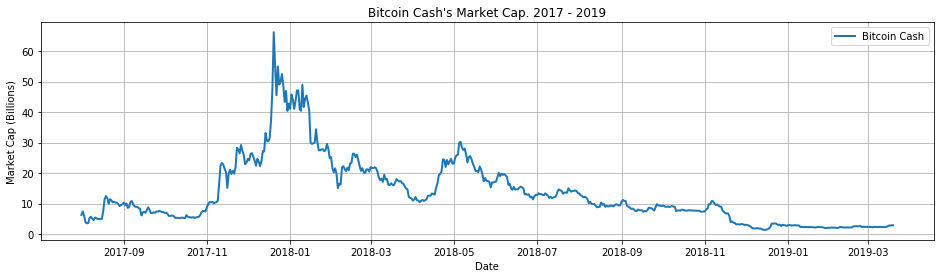

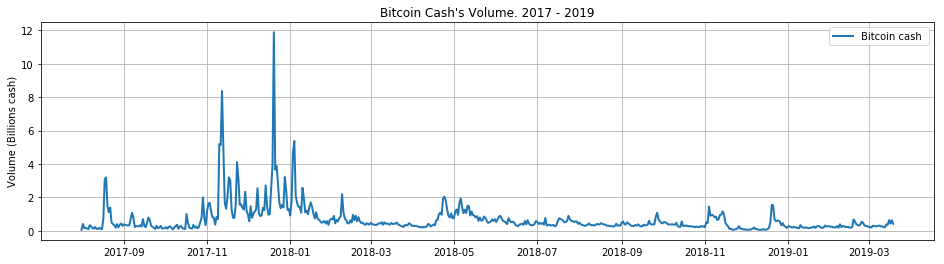

In [9]:
x = bch_history['dt']
y = bch_history['Market Cap'] /1e9
plt.figure(figsize=(16,4))
plt.plot(x, y, linewidth=2,  label='Bitcoin Cash')

plt.legend()
plt.xlabel('Date')
#plt.xticks(np.arange(1900, 2020, 10.0))
plt.ylabel('Market Cap (Billions)')
plt.title("Bitcoin Cash's Market Cap. 2017 - 2019")
plt.grid(True)




x = bch_history['dt']
y = bch_history['Volume'] /1e9
plt.figure(figsize=(16,4))
plt.plot(x, y, linewidth=2,  label='Bitcoin cash ')
# plt.fill_between
plt.ylabel('Volume (Billions cash)')
plt.title("Bitcoin Cash's Volume. 2017 - 2019")
plt.legend()
plt.grid(True)

### The iniaial price/market Cap./volum of Bitcoin Cash (BCH) on its birthday

In [10]:
df_help=bch_history[bch_history['dt']=="2017-08-01"]

print(df_help[[ 'Date', 'Open*','Volume', 'Market Cap']])


             Date  Open*    Volume  Market Cap
595  Aug 01, 2017  294.6  65988800  6263348571


Interesting, the opening price of this newlly cryptocurrency at its birthday is nonzero!

### Maximum price of Bitcoin Cash

In [11]:
df_help=bch_history[bch_history['High']==bch_history['High'].max()]
df_help

print(df_help[[ 'Date', 'High']])

             Date     High
454  Dec 20, 2017  4355.62


### Plot Bitcoin and Bitcoin Chash Market Cap

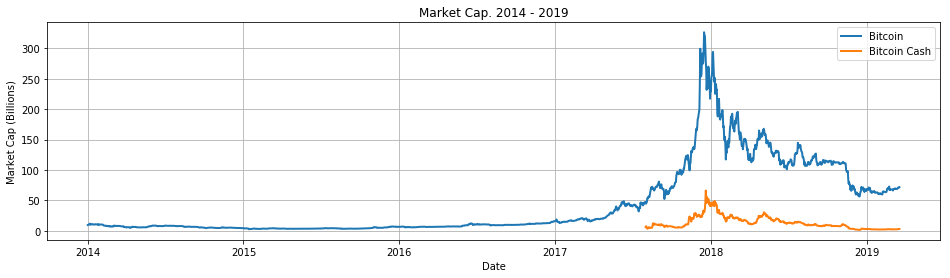

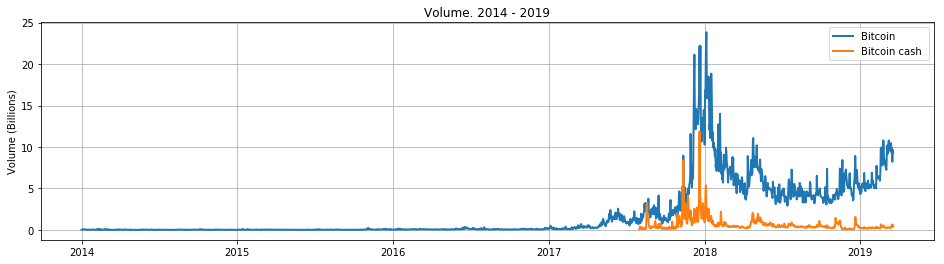

In [12]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(16,4))
x = btc_history['dt']
y = btc_history['Market Cap'] / 1e9
plt.plot(x, y, linewidth=2,  label='Bitcoin ')

x = bch_history['dt']
y = bch_history['Market Cap'] /1e9

plt.plot(x, y, linewidth=2,  label='Bitcoin Cash')

# plt.fill_between(x, 0, y1)
plt.legend()
plt.xlabel('Date')
#plt.xticks(np.arange(1900, 2020, 10.0))
plt.ylabel('Market Cap (Billions)')
plt.title("Market Cap. 2014 - 2019")
plt.grid(True)



plt.figure(figsize=(16,4))
x = btc_history['dt']
y = btc_history['Volume'] / 1e9
plt.plot(x, y, linewidth=2,  label='Bitcoin ')

x = bch_history['dt']
y = bch_history['Volume'] /1e9

plt.plot(x, y, linewidth=2,  label='Bitcoin cash ')

plt.ylabel('Volume (Billions)')
plt.title("Volume. 2014 - 2019")
plt.legend()
plt.grid(True)

### let's zoom in to the Bitcoin Cash birthday  AUgust 01, 2017


#### Plot Bitcoin and Bitcoin Chash Market Cap in August 2017

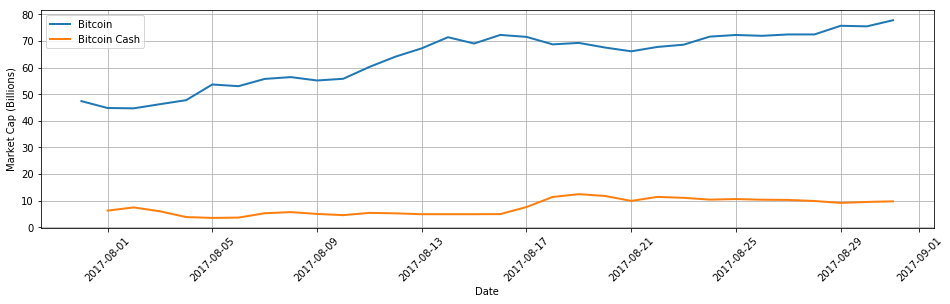

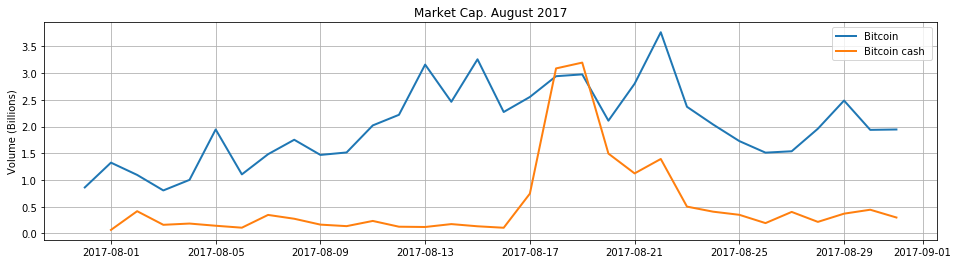

In [13]:
start= "2017-07-30"
end="2017-09-01"

btc_ch_plt = bch_history[(bch_history['dt']> start)  &  (bch_history['dt']< end)]
btc_plt = btc_history[(btc_history['dt']> start)  &  (btc_history['dt']< end)]

plt.figure(figsize=(16,4))
plt.xticks( rotation=45)
x = btc_plt['dt']
y = btc_plt['Market Cap'] / 1e9
plt.plot(x, y, linewidth=2,  label='Bitcoin ')
x = btc_ch_plt['dt']
y = btc_ch_plt['Market Cap'] /1e9
plt.plot(x, y, linewidth=2,  label='Bitcoin Cash')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Market Cap (Billions)')
#plt.title("Market Cap. August 2017")
plt.grid(True)

plt.figure(figsize=(16,4))
x = btc_plt['dt']
y = btc_plt['Volume'] / 1e9
plt.plot(x, y, linewidth=2,  label='Bitcoin ')
x = btc_ch_plt['dt']
y = btc_ch_plt['Volume'] /1e9
plt.plot(x, y, linewidth=2,  label='Bitcoin cash ')

plt.ylabel('Volume (Billions)')
plt.title("Market Cap. August 2017")
plt.legend()
plt.grid(True)

It seems that the introduction of the Bitcoin Crash in to the market had negetive effect on Bitcoin ( Market cap. decreased), however, and Bitcoin's volume increased on August 01, 2017.

### Plot a Pie Chart of Coins by Marketcap

In [14]:
df_help1=bch_history[bch_history['dt']=="2019-03-01"]
df_help1["name"]="BTC"
df_help2=btc_history[btc_history['dt']=="2019-03-01"]
df_help2["name"]="BCH"
df_con=pd.concat([df_help1,df_help2])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [15]:
# Aggregate smaller values into 'other' category
num_coins = 1
data = sorted(list(zip(df_con['Market Cap'].values, df_con['name'].values)), reverse=True)
data
[sizes, labels] = zip(*data)


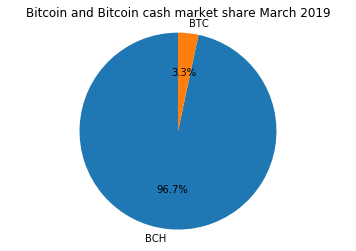

In [16]:
# Plot the chart
fig1, ax1 = plt.subplots()
plt.title("Bitcoin and Bitcoin cash market share March 2019")
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Plot Bitcoin and Bitcoin Chash Market Cap in Nov 2018

The latest hard fork, scheduled for Nov. 15 2018.  

Now that Bitcoin Cash has forked into two rivalling cryptocurrencies – BAB and BSV.

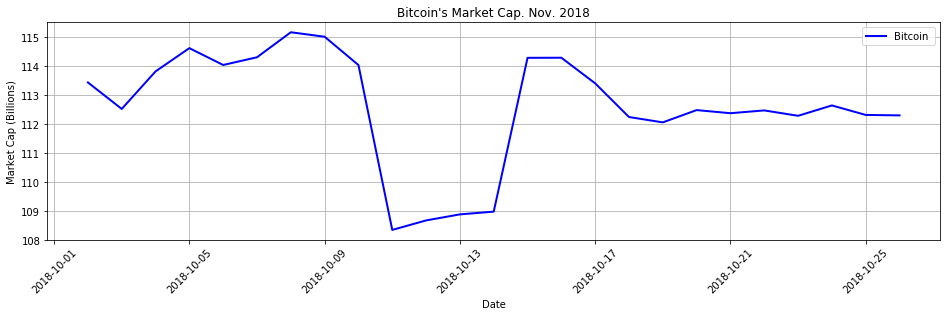

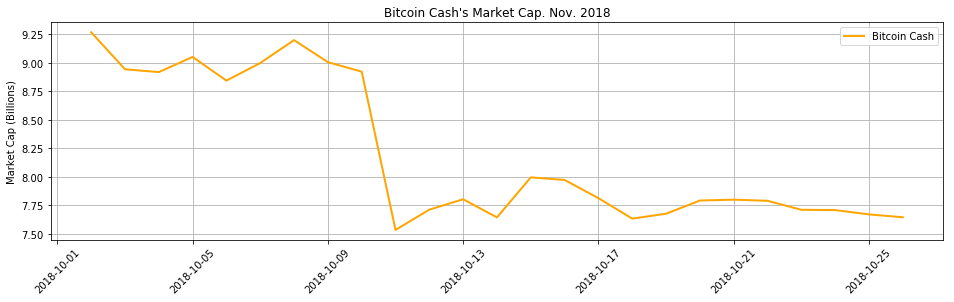

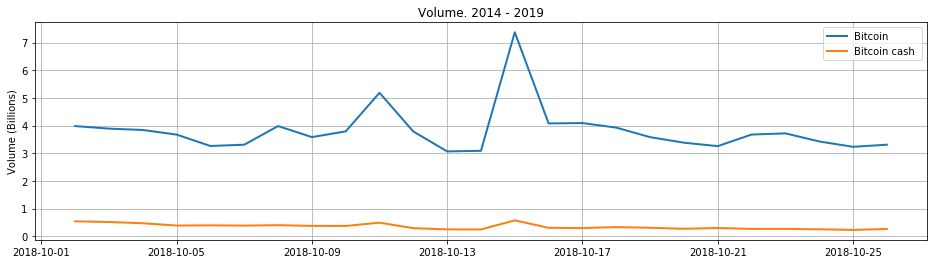

In [17]:
start= "2018-10-01"
end="2018-10-27"
btc_ch_plt = bch_history[(bch_history['dt']> start)  &  (bch_history['dt']< end)]
btc_plt = btc_history[(btc_history['dt']> start)  &  (btc_history['dt']< end)]

plt.figure(figsize=(16,4))
plt.title("Bitcoin's Market Cap. Nov. 2018")
plt.xticks( rotation=45)
x = btc_plt['dt']
y = btc_plt['Market Cap'] / 1e9
plt.plot(x, y, linewidth=2,  label='Bitcoin ', color='blue')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Market Cap (Billions)')
#plt.title("Bitcoin's Market Cap. 2014 - 2019")
plt.grid(True)

plt.figure(figsize=(16,4))
plt.title("Bitcoin Cash's Market Cap. Nov. 2018")
x = btc_ch_plt['dt']
y = btc_ch_plt['Market Cap'] /1e9
plt.plot(x, y, linewidth=2,  label='Bitcoin Cash', color='orange')
plt.xticks( rotation=45)
plt.legend()
plt.ylabel('Market Cap (Billions)')
plt.grid(True)


plt.figure(figsize=(16,4))
x = btc_plt['dt']
y = btc_plt['Volume'] / 1e9
plt.plot(x, y, linewidth=2,  label='Bitcoin ')
x = btc_ch_plt['dt']
y = btc_ch_plt['Volume'] /1e9
plt.plot(x, y, linewidth=2,  label='Bitcoin cash ')
plt.ylabel('Volume (Billions)')
plt.title("Volume. 2014 - 2019")
plt.legend()
plt.grid(True)

It seems that the split of Bitcoin cash to two cryptocurrency on Nov. 15, 2018 had significant effect on both Bitcoin and Bitcoin Cash.
Both crypto  had fallen significantly on Nov., 11, 2018. However, both reached a peak on the day of split (Nov. 15). 